# Flight Price Prediction

### >Using historical data and machine learning techniques to forecast future airfare prices.

## Benefits for Travelers:

### Informed Travel Decisions: Accurate flight price predictions enable travelers to make informed decisions about their travel plans, potentially saving money by booking flights during low-price periods.

### Flexible Travel Planning: By understanding price trends, travelers can plan their trips more flexibly, opting for less expensive travel dates or destinations.

### Importing necessary libraries

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [152]:
# Reading the csv file
df=pd.read_csv(r"C:\Users\ssuyo\Desktop\FLIGHT_IND\Flight_data.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [153]:
#coulumns present in the dataset
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [154]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.

In [155]:
# Checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Using "isnull" method we can able to observe sum of missing values present in the dataset. 
#### It looks like there only two null values present. 
#### So we can drop them as it won't significantly impact our analysis.

In [156]:
df.dropna(inplace = True)  # dropping null values

#### The "dropna()" method with "inplace=True" removes rows with null values from the DataFrame 'df', modifying it in place.

In [157]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Exploratory Data Analysis (EDA)

In [158]:
# Checking the type of dataset
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [159]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# Feature Engineering

The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [160]:
# Converting Date and Time columns from object type to Datetime Type
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='mixed')

In [161]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Now we can extract 'Year','Month' & 'Day' from 'Date_of_Journey' \
since the dataset contains only 2019 year data so no need to take year column
We will extract only 'Month' & 'Day'  

In [162]:
# Extracting Day from Date_of_Journey column
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [163]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [164]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%Y-%m-%d %H:%M:%S').dt.time
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%Y-%m-%d %H:%M:%S').dt.time
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25:00,04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,1,3


In the 'Duration' column we can see some data in 'hh:mm' and some in 'hh' format.\
So for better understanding we will convert the duration into minutes.

In [165]:
# Defining function to convert duration
def convert_duration(duration):
    # Check if duration is in the format "Xh Ym"
    if len(duration.split()) == 2:
        hours = int(duration.split()[0][:-1])
        minutes = int(duration.split()[1][:-1])
        return hours * 60 + minutes
    # Check if duration is in the format "Xh"
    else:
        # Extract the number of hours and convert to minutes
        return int(duration[:-1]) * 60

In [166]:
# Applying convert_duration() to 'Duration' column
df.Duration=df.Duration.apply(convert_duration)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20:00,01:10:00,170,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50:00,13:15:00,445,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25:00,04:25:00,1140,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05:00,23:30:00,325,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50:00,21:35:00,285,1 stop,No info,13302,1,3


In [167]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*100)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
****************************************************************************************************
Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64
****************************************************************************************************
Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: in

In [168]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
df["Airline"] = df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
df["Airline"] = df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
df["Airline"] = df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

In [169]:
# As we can see majority do not have any information, so it is very difficult to understand.\
# So the best way is we remove this particular column.
df.drop('Additional_Info',axis=1,inplace=True)

In [170]:
df.drop(["Route"], axis = 1, inplace = True)

In [171]:
#Now let's check the value counts in the above columns
val_count = ["Airline","Destination"]
for i in val_count:
        print(df[i].value_counts())
        print('*'*100)

Airline
Jet Airways          3855
IndiGo               2053
Air India            1751
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: count, dtype: int64
****************************************************************************************************
Destination
Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64
****************************************************************************************************


These are the number of unique values present in each columns.

In [172]:
# Checking number of unique values in each column
df.nunique()

Airline             9
Source              5
Destination         5
Dep_Time          222
Arrival_Time      223
Duration          367
Total_Stops         5
Price            1870
Journey_day        10
Journey_month       4
dtype: int64

<Axes: >

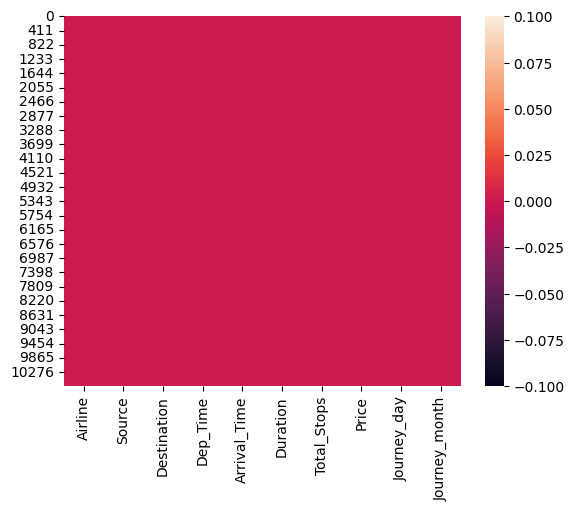

In [173]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

So it is clear that there are no missing values found.

# Data Visualization

# Univariate Analysis

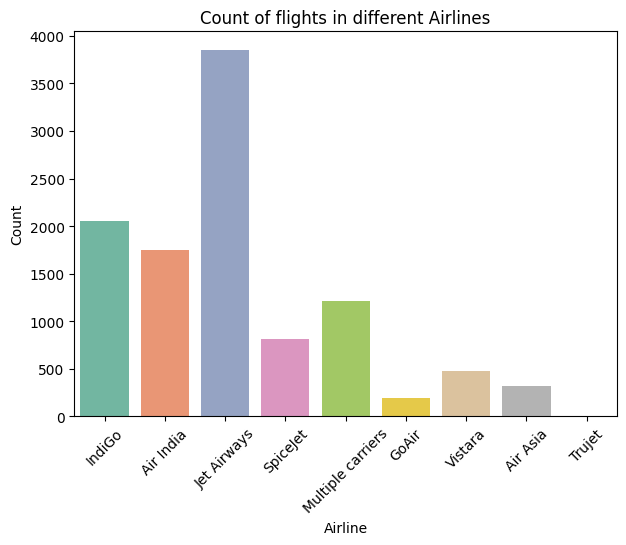

In [174]:
# Visualizing the various Airlines present in the dataset
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Airline", palette="Set2")
plt.title("Count of flights in different Airlines")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The count of flights is high in Jet Airways and the count is very less in Trujet and GoAir category.

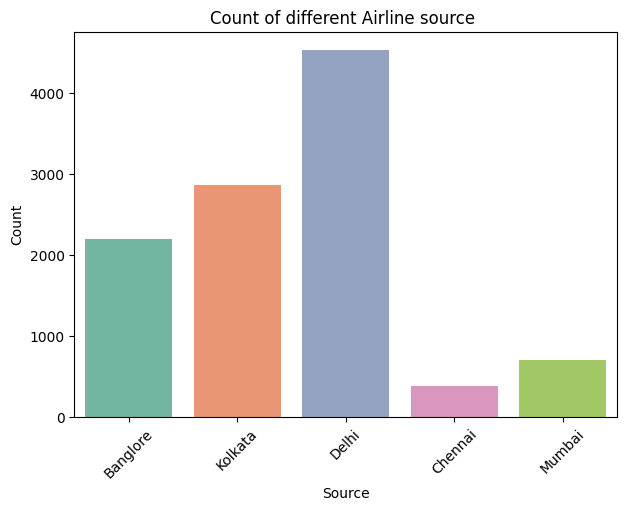

In [175]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Source", palette="Set2")
plt.title("Count of different Airline source ")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The count of source is high in Delhi which means most of the flighs service begins in Delhi.

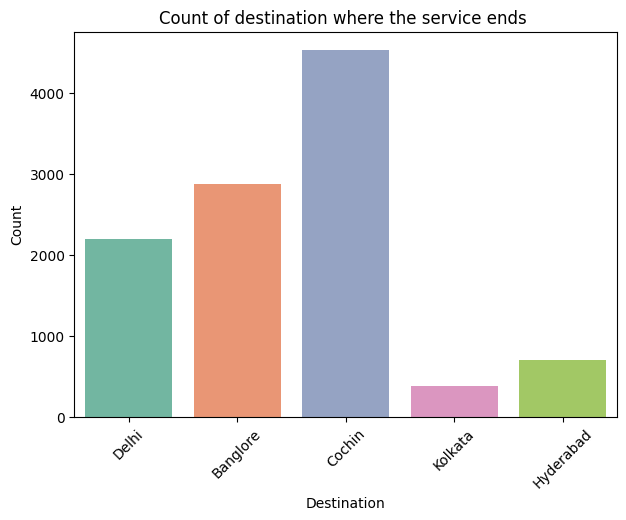

In [176]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Destination", palette="Set2")
plt.title("Count of destination where the service ends ")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The Cochin destination has highest counts. Most of the flights services ends in Cochin destination.

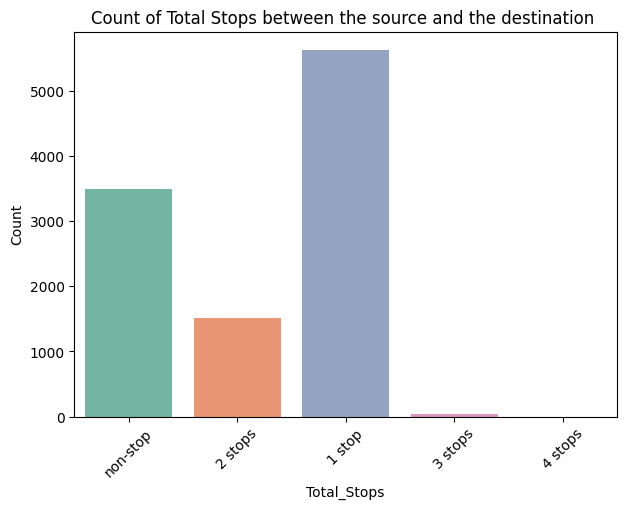

In [177]:
# Visualizing the Total Stops between the source and the destination
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Total_Stops", palette="Set2")
plt.title("Count of Total Stops between the source and the destination ")
plt.xlabel("Total_Stops")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The count is high in 1 stop followed by non-stop. Most of the flights have only 1 stop between the source and the destination.

# Bivariate Analysis


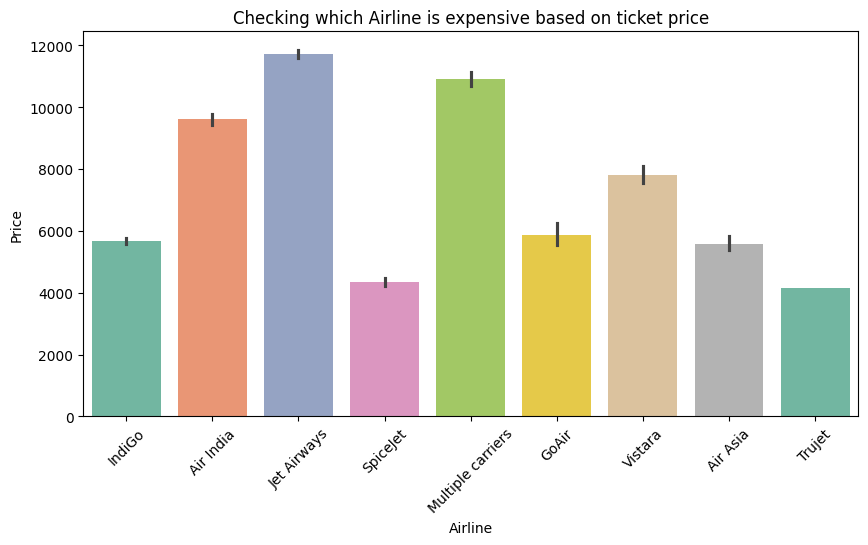

In [178]:
# Let's check which Airline is expensive based on Price of tickets

plt.figure(figsize=(10, 5))
sns.barplot(x="Airline", y="Price", palette="Set2",data=df)
plt.title("Checking which Airline is expensive based on ticket price")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The bar plot shows that the Jet Airways is most expensive Airline followed by Multiple carriers and Air India.\
The Trujet and Spicejet are have very cheap ticket prices compared to others.


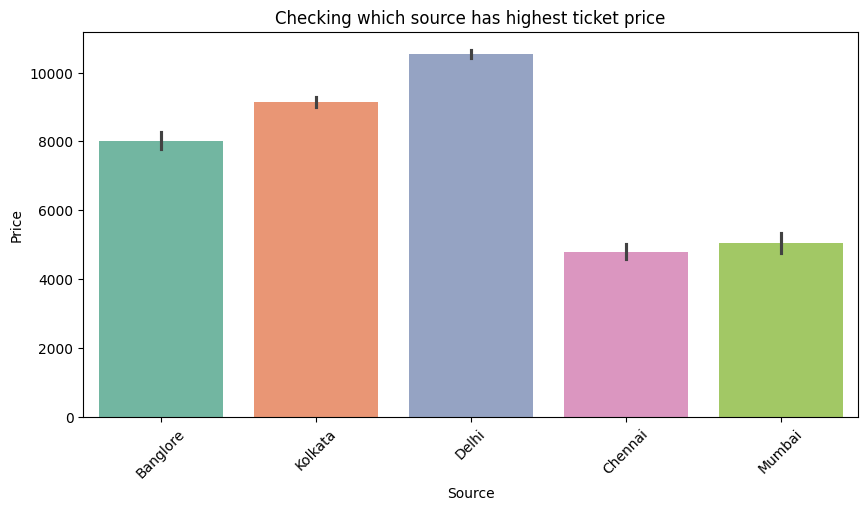

In [179]:
# Let's check the ticket prices in different sources

plt.figure(figsize=(10, 5))
sns.barplot(x="Source", y="Price", palette="Set2",data=df)
plt.title("Checking which source has highest ticket price")
plt.xlabel("Source")
plt.ylabel("Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The tickes prices are expensive in Delhi region compared to others and price is cheaper in Chennai and Mumbai sources.

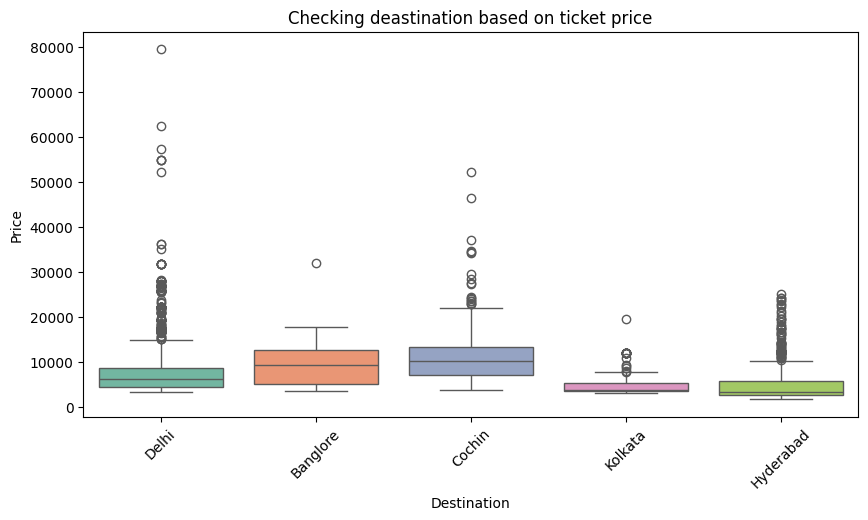

In [180]:
# Let's check how prices changes in each destination 

plt.figure(figsize=(10, 5))
sns.boxplot(x="Destination", y="Price", palette="Set2",data=df)
plt.title("Checking deastination based on ticket price")
plt.xlabel("Destination")
plt.ylabel("Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The ticket price is high in Cochin destination followed by Bangalore which means they have long distance from the source.

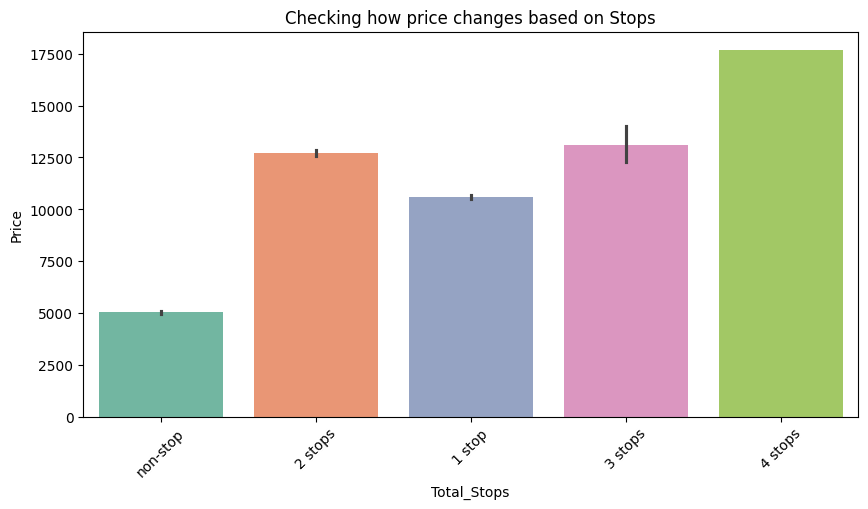

In [181]:
# Let's check the price vs total stops
plt.figure(figsize=(10, 5))
sns.barplot(x="Total_Stops", y="Price", palette="Set2",data=df)
plt.title("Checking how price changes based on Stops")
plt.xlabel("Total_Stops")
plt.ylabel("Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [182]:
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,22:20:00,01:10:00,170,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50:00,13:15:00,445,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25:00,04:25:00,1140,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05:00,23:30:00,325,1 stop,6218,12,5
4,IndiGo,Banglore,Delhi,16:50:00,21:35:00,285,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55:00,22:25:00,150,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,20:45:00,23:20:00,155,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,08:20:00,11:20:00,180,non-stop,7229,27,4
10681,Vistara,Banglore,Delhi,11:30:00,14:10:00,160,non-stop,12648,1,3


Here the flights with 4 stops have highest price followed by flights having 3 stops and the flights which have no stops is having very less ticket price compared to others.

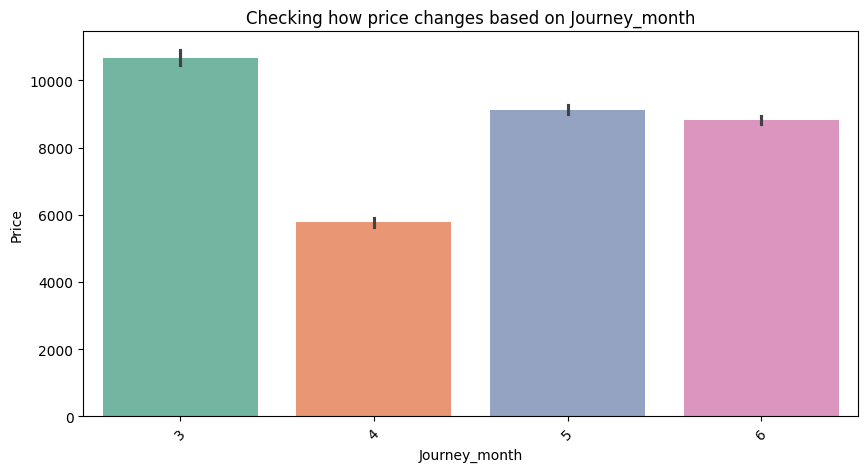

In [183]:
# Checking relation between Journey_Month and Price
plt.figure(figsize=(10, 5))
sns.barplot(x="Journey_month", y="Price", palette="Set2",data=df)
plt.title("Checking how price changes based on Journey_month")
plt.xlabel("Journey_month")
plt.ylabel("Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

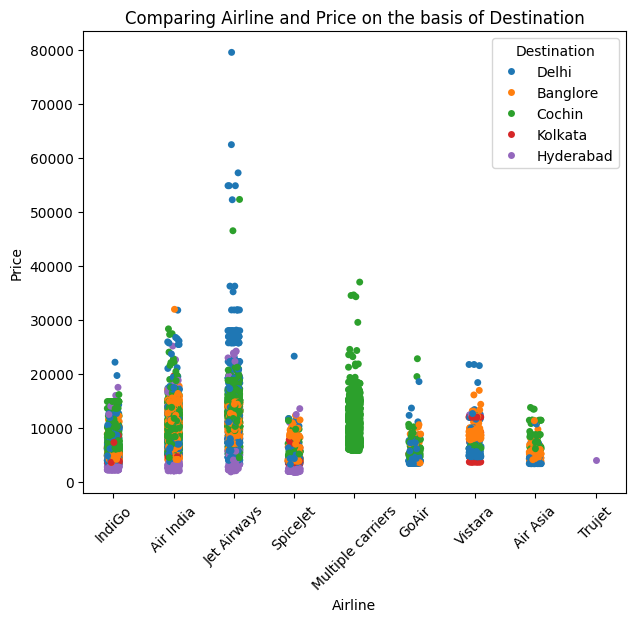

In [184]:
# Checking how the price pays role in Airline on the basis of destination
plt.figure(figsize=(7,6))
sns.stripplot(x='Airline',y='Price',hue="Destination",data=df)
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=45)
plt.show()


Here we can conclude that the Jet Airways flights that are destined to Delhi are have more expensive ticket prices compared to others.

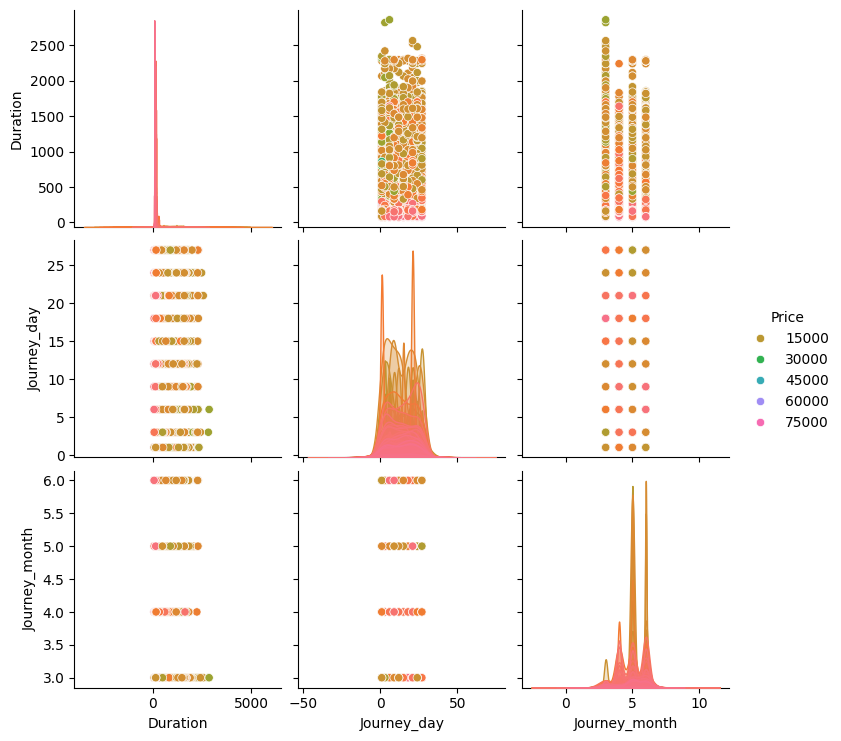

In [185]:
sns.pairplot(df,hue="Price",palette="husl")
plt.show()

## Building Machine Learning Models & Evaluating them

In [186]:
from sklearn.preprocessing import LabelEncoder
num_col=[]
cat_col=[]

for i in df:
    if df[i].dtypes=="object":
        cat_col.append(i)
    else:
        num_col.append(i)

le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

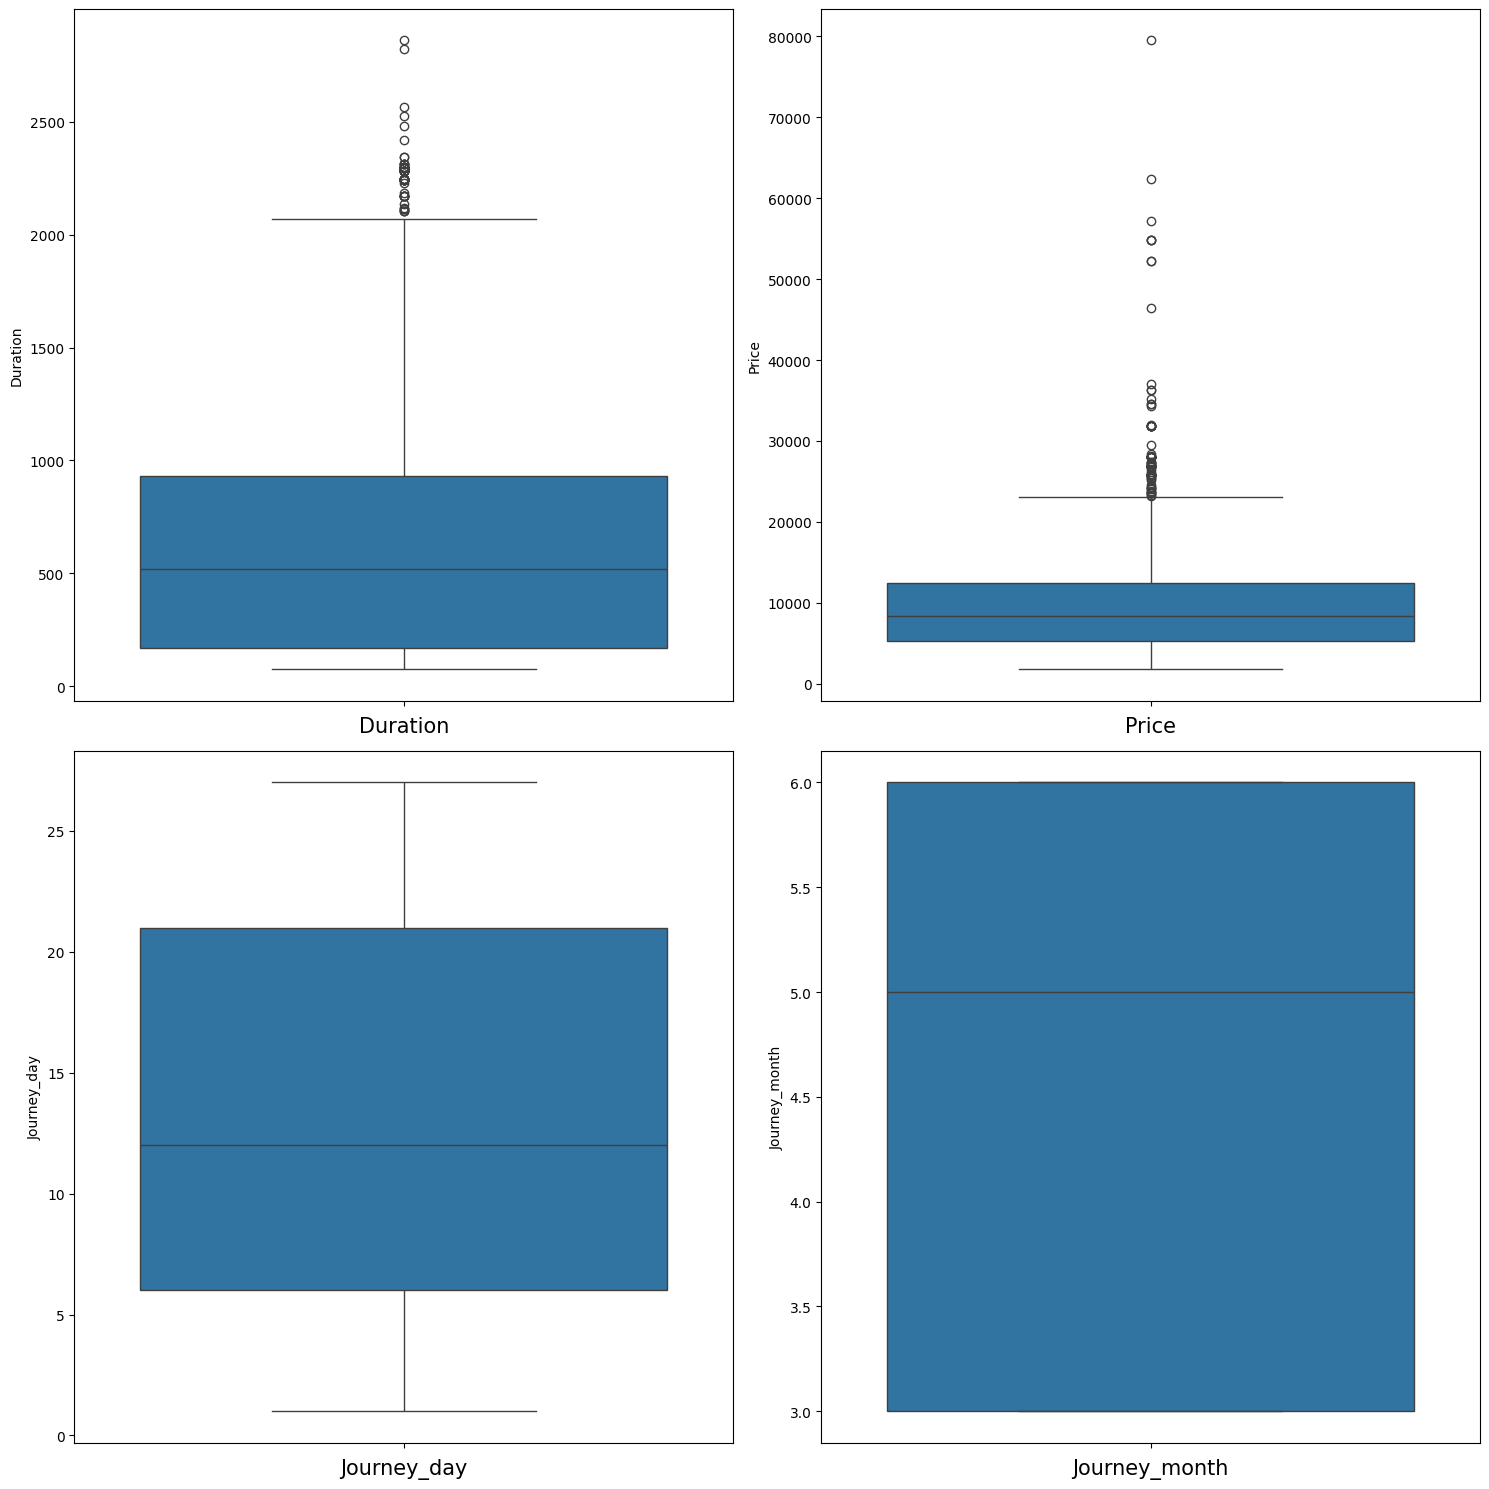

In [187]:
# Identifying the outliers using boxplot

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [188]:
#REMOVING OULIERS BY USING Z-SCORE
from scipy.stats import zscore
z=np.abs(zscore(df)) 
z

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,0.339212,1.658359,0.815054,1.686447,1.557148,0.931601,1.407210,1.125535,1.237288,1.467402
1,1.456185,0.890014,1.159411,1.260282,0.164576,0.390028,0.253703,0.309068,1.475307,0.250289
2,0.219275,0.040556,0.172179,0.621824,1.284688,0.978676,0.253703,1.039783,0.531796,1.109135
3,0.339212,0.890014,1.159411,0.917024,1.545866,0.626351,0.807341,0.622209,0.177979,0.250289
4,0.339212,1.658359,0.815054,0.671463,1.197723,0.705125,0.807341,0.914006,1.475307,1.467402
...,...,...,...,...,...,...,...,...,...,...
10678,2.014672,0.890014,1.159411,1.228067,1.349089,0.970988,1.407210,1.079995,0.531796,0.608557
10679,1.456185,0.890014,1.159411,1.391775,1.515593,0.961141,1.407210,1.071754,1.591104,0.608557
10680,0.219275,1.658359,0.815054,0.818272,0.482446,0.911908,1.407210,0.402967,1.591104,0.608557
10681,2.453222,1.658359,0.815054,0.261668,0.013210,0.951295,1.407210,0.772181,1.475307,1.467402


In [189]:
new_df=df[(z<=3).all(axis=1)]
new_df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,3,0,2,211,12,170,4,3897,24,3
1,1,3,0,31,104,445,1,7662,1,5
2,4,2,1,70,30,1140,1,13882,9,6
3,3,3,0,164,217,325,0,6218,12,5
4,3,0,2,149,194,285,0,13302,1,3
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,183,204,150,4,4107,9,4
10679,1,3,0,193,215,155,4,4145,27,4
10680,4,0,2,58,83,180,4,7229,27,4
10681,8,0,2,92,114,160,4,12648,1,3


In [190]:
dataloss=(10682 -10521  )/10682 *100
dataloss #10% DATA LOSS IS ACCEPTABLE

1.507208387942333

# Checking skewness in the data

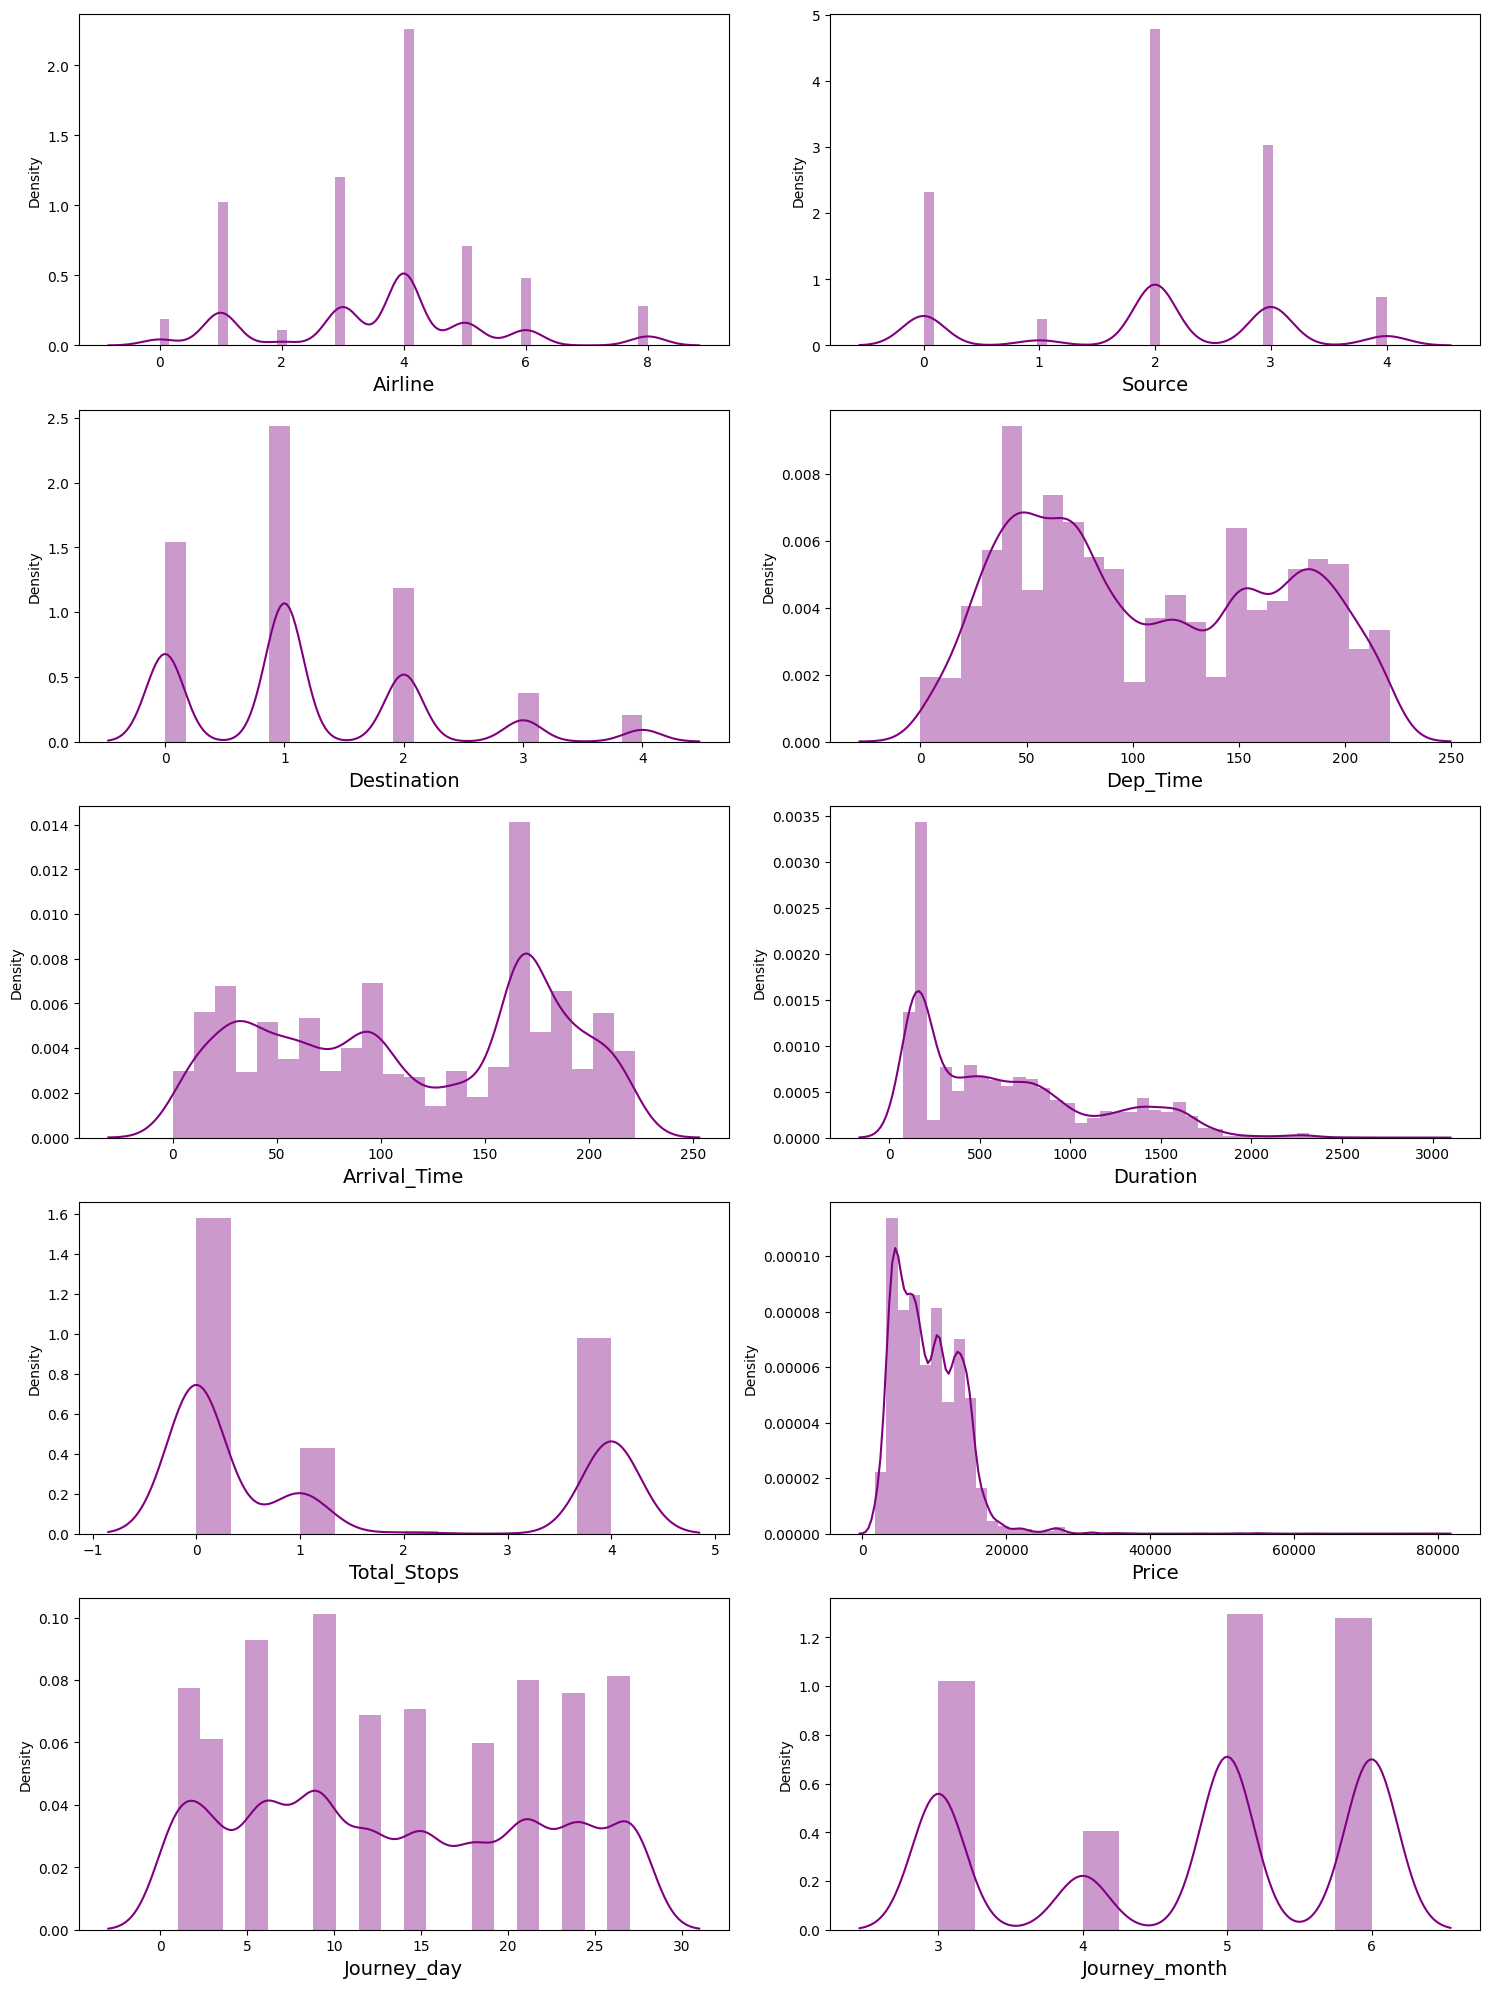

In [191]:
#SKEWNESS
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[column],color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

In [192]:
df.skew()

Airline          0.135622
Source          -0.424023
Destination      0.846631
Dep_Time         0.194914
Arrival_Time    -0.104134
Duration         0.861541
Total_Stops      0.631532
Price            1.812405
Journey_day      0.118174
Journey_month   -0.387409
dtype: float64

## SKEWNESS REMOVAL


In [193]:
# Identify columns with skewness
skewed_columns = df.skew().sort_values(ascending=False)

# Select columns with significant skewness (you can adjust the threshold)
highly_skewed_columns = skewed_columns[abs(skewed_columns) > 0.5]

# Apply logarithmic transformation to reduce skewness
df[highly_skewed_columns.index] = np.log1p(df[highly_skewed_columns.index])

# Check skewness after transformation
new_skewness = df.skew().sort_values(ascending=False)

# Print the new skewness values
print(new_skewness)

Total_Stops      0.466329
Dep_Time         0.194914
Airline          0.135622
Journey_day      0.118174
Destination     -0.093116
Arrival_Time    -0.104134
Duration        -0.161565
Price           -0.254592
Journey_month   -0.387409
Source          -0.424023
dtype: float64


# Correlation between the target variable and independent variables using HEAT map

In [194]:
corr=new_df.corr()
corr

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
Airline,1.000000,-0.013135,0.055367,-0.033147,-0.000301,-0.108944,-0.009338,0.024954,0.022979,0.031944
Source,-0.013135,1.000000,-0.432999,0.056520,0.031333,0.171805,-0.236797,0.075937,-0.010908,0.172574
Destination,0.055367,-0.432999,1.000000,-0.080958,-0.070050,-0.397322,0.517900,-0.332826,0.012247,-0.145299
Dep_Time,-0.033147,0.056520,-0.080958,1.000000,0.058604,0.023173,0.043737,0.006528,0.000430,0.030484
Arrival_Time,-0.000301,0.031333,-0.070050,0.058604,1.000000,0.029124,-0.100117,0.033818,-0.001654,-0.003234
Duration,-0.108944,0.171805,-0.397322,0.023173,0.029124,1.000000,-0.622223,0.577817,-0.018771,0.036622
Total_Stops,-0.009338,-0.236797,0.517900,0.043737,-0.100117,-0.622223,1.000000,-0.623413,0.021379,-0.036800
Price,0.024954,0.075937,-0.332826,0.006528,0.033818,0.577817,-0.623413,1.000000,-0.116278,-0.044379
Journey_day,0.022979,-0.010908,0.012247,0.000430,-0.001654,-0.018771,0.021379,-0.116278,1.000000,-0.056871
Journey_month,0.031944,0.172574,-0.145299,0.030484,-0.003234,0.036622,-0.036800,-0.044379,-0.056871,1.000000


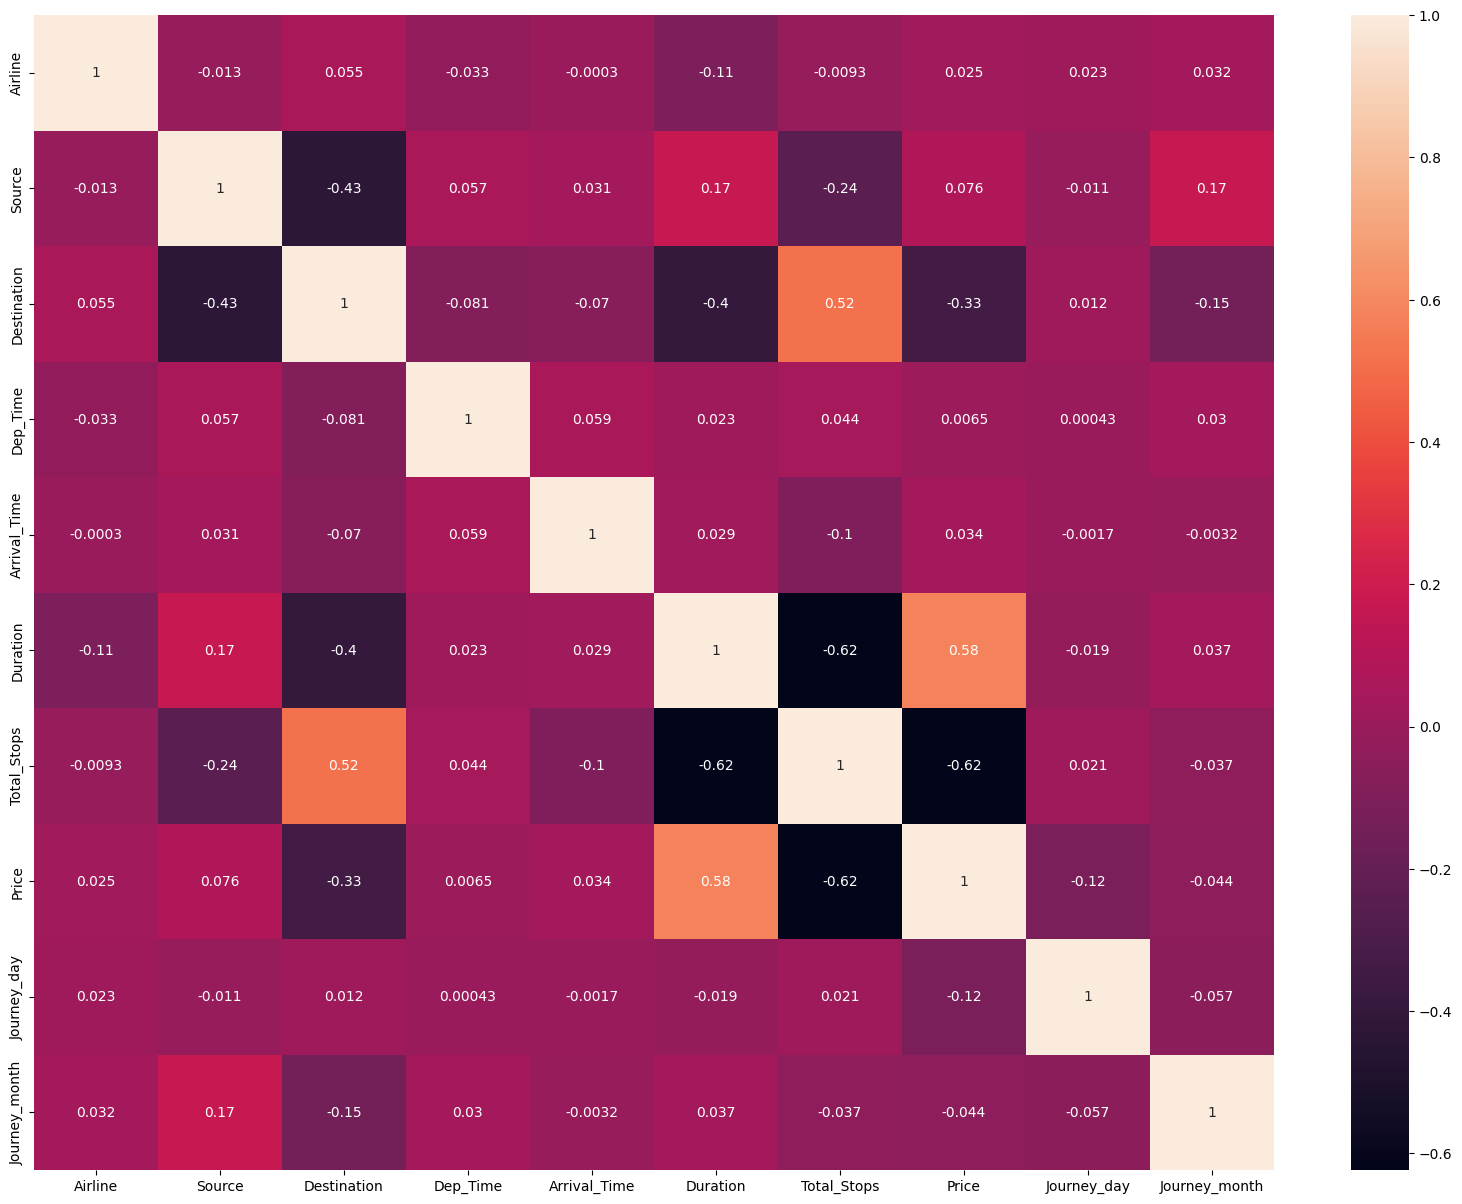

In [195]:
# Visualizing the correlation by plotting heat map.
plt.figure(figsize=(20,15))  
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [196]:
corr['Price'].sort_values(ascending=False)

Price            1.000000
Duration         0.577817
Source           0.075937
Arrival_Time     0.033818
Airline          0.024954
Dep_Time         0.006528
Journey_month   -0.044379
Journey_day     -0.116278
Destination     -0.332826
Total_Stops     -0.623413
Name: Price, dtype: float64

### splitting dataset into features (x) and the target variable (y)

In [197]:
x=new_df.drop('Price',axis=1)
y=new_df['Price']

In [198]:
# Dimension of x and y
x.shape, y.shape

((10521, 9), (10521,))

# Feature Scaling using Standard Scalarization

In [199]:
# Normalising Dataset

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(x)

### Spliting Dataset into train and test

In [200]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=45,test_size=0.2)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8416, 9)
(2105, 9)
(8416,)
(2105,)


In [201]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def mymodel(model):
    model.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)    
    train=(model.score(xtrain,ytrain)*100)
    test=(model.score(xtest,ytest)*100)
    print(f"Training Accuracy:{train}\nTesting Accuracy:{test}")
    
    return model

## Model-1 Linear Regression

In [202]:
from sklearn.linear_model import LinearRegression

lr=mymodel(LinearRegression())

y_pred=lr.predict(xtest)

MSE_lr=mean_squared_error(ytest,y_pred)

RMSE_lr=np.sqrt(mean_squared_error(ytest, y_pred))

MAE_lr=np.sqrt(mean_absolute_error(ytest, y_pred))
               
R2_lr=r2_score(ytest, y_pred)

print(f"Mean Squared Error (MSE):{MSE_lr}\nRoot Mean Squared Error (RMSE):{RMSE_lr}\nMean Absolute Error (MAE):{MAE_lr}\nR-squared (R2):{R2_lr}")


Training Accuracy:47.22329675575099
Testing Accuracy:47.89564962262863
Mean Squared Error (MSE):8300115.406946432
Root Mean Squared Error (RMSE):2880.992087275915
Mean Absolute Error (MAE):47.924688137653476
R-squared (R2):0.47895649622628633


## Model-2 Random Forest

In [203]:
from sklearn.ensemble import RandomForestRegressor
rfr=mymodel(RandomForestRegressor(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='sqrt',
 max_depth=25))

y_pred=rfr.predict(xtest)

MSE_rfr=mean_squared_error(ytest,y_pred)

RMSE_rfr=np.sqrt(mean_squared_error(ytest, y_pred))

MAE_rfr=np.sqrt(mean_absolute_error(ytest, y_pred))
               
R2_rfr=r2_score(ytest, y_pred)

print(f"Mean Squared Error (MSE):{MSE_rfr}\nRoot Mean Squared Error (RMSE):{RMSE_rfr}\nMean Absolute Error (MAE):{MAE_rfr}\nR-squared (R2):{R2_rfr}")



Training Accuracy:94.85588035397974
Testing Accuracy:80.20777921199328
Mean Squared Error (MSE):3152859.895774938
Root Mean Squared Error (RMSE):1775.629436502712
Mean Absolute Error (MAE):34.60163626181482
R-squared (R2):0.8020777921199329


## Model-3 XGBoost

In [204]:
import xgboost as xgb
xgbc=mymodel(xgb.XGBRegressor(n_estimators=29))

y_pred=xgbc.predict(xtest)

MSE_XGB=mean_squared_error(ytest,y_pred)

RMSE_XGB=np.sqrt(mean_squared_error(ytest, y_pred))

MAE_XGB=np.sqrt(mean_absolute_error(ytest, y_pred))
               
R2_XGB=r2_score(ytest, y_pred)

print(f"Mean Squared Error (MSE):{MSE_XGB}\nRoot Mean Squared Error (RMSE):{RMSE_XGB}\nMean Absolute Error (MAE):{MAE_XGB}\nR-squared (R2):{R2_XGB}")

Training Accuracy:87.7249549790177
Testing Accuracy:84.16720622771737
Mean Squared Error (MSE):2522131.349350839
Root Mean Squared Error (RMSE):1588.121956699434
Mean Absolute Error (MAE):33.94799133381643
R-squared (R2):0.8416720622771737


## Model-4 DecisionTree

In [205]:
from sklearn.tree import DecisionTreeRegressor
dtr=mymodel(DecisionTreeRegressor())
y_pred=dtr.predict(xtest)

MSE_dtr=mean_squared_error(ytest,y_pred)

RMSE_dtr=np.sqrt(mean_squared_error(ytest, y_pred))

MAE_dtr=np.sqrt(mean_absolute_error(ytest, y_pred))
               
R2_dtr=r2_score(ytest, y_pred)

print(f"Mean Squared Error (MSE):{MSE_dtr}\nRoot Mean Squared Error (RMSE):{RMSE_dtr}\nMean Absolute Error (MAE):{MAE_dtr}\nR-squared (R2):{R2_dtr}")


Training Accuracy:96.18114477070357
Testing Accuracy:70.127111779555
Mean Squared Error (MSE):4758689.398729877
Root Mean Squared Error (RMSE):2181.4420456958915
Mean Absolute Error (MAE):36.23309172382317
R-squared (R2):0.70127111779555


# Hyper parameter Tunning

In [206]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

# Create the XGBRegressor
xgbr = xgb.XGBRegressor()

# Define a custom scoring metric if needed (e.g., mean squared error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgbr,
    param_distributions=param_grid,
    n_iter=10,
    scoring=scorer,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(xtrain, ytrain)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)
print("*"*200)

# Access the best model directly
best_xgb_model = random_search.best_estimator_

# Use the best model for predictions
y_pred = best_xgb_model.predict(xtest)

# Use the best model for predictions
best_xgb_model = mymodel(best_xgb_model)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
********************************************************************************************************************************************************************************************************
Training Accuracy:88.39926285211948
Testing Accuracy:84.16482928089263


In [211]:
# Define hyperparameters for XGBoost model
xgb_params = {
    'subsample': 0.8,
    'n_estimators': 100,
    'min_child_weight': 3,
    'max_depth': 5,
    'learning_rate': 0.2,
    'colsample_bytree': 0.9
}

# Initialize the XGBoost model with specified hyperparameters
final_model = xgb.XGBRegressor(**xgb_params)

# Fit the model on training data
final_model.fit(xtrain, ytrain)

# Make predictions on the testing data
y_pred = final_model.predict(xtest)

# Calculate evaluation metrics
MSE_XGB1 = mean_squared_error(ytest, y_pred)
RMSE_XGB1 = np.sqrt(mean_squared_error(ytest, y_pred))
MAE_XGB1 = mean_absolute_error(ytest, y_pred)
R2_XGB1 = r2_score(ytest, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {MSE_XGB1}\nRoot Mean Squared Error (RMSE): {RMSE_XGB1}\nMean Absolute Error (MAE): {MAE_XGB}\nR-squared (R2): {R2_XGB1}")

Mean Squared Error (MSE): 2522509.9920710446
Root Mean Squared Error (RMSE): 1588.2411630703457
Mean Absolute Error (MAE): 33.94799133381643
R-squared (R2): 0.8416482928089264


In [210]:
# Define the models and their results
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "XGBRegressor"]
MSE = [MSE_lr, MSE_dtr, MSE_rfr, MSE_XGB1]
RMSE = [RMSE_lr, RMSE_dtr, RMSE_rfr, RMSE_XGB1]
MAE = [MAE_lr, MAE_dtr, MAE_rfr, MAE_XGB]
R2 = [R2_lr, R2_dtr, R2_rfr, R2_XGB1]

# Create a DataFrame to display the results with indexing starting from 1 and labeled as 'Model no.'
results = pd.DataFrame({
    'Model': models,
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R Squared': R2
})

def highlight(val):
    if val == results['MSE'].min() or val == results['RMSE'].min() or val == results['MAE'].min():
        return 'background-color: yellow; color: black; font-weight: bold;'
    elif val == results['R Squared'].max():
        return 'background-color: blue; font-weight: bold;'
    else:
        return ''

styled_results = results.style.applymap(highlight)
styled_results


,Model,MSE,RMSE,MAE,R Squared
0,Linear Regression,8300115.406946,2880.992087,47.924688,0.478956
1,Decision Tree Regressor,4758689.398730,2181.442046,36.233092,0.701271
2,Random Forest Regressor,3152859.895775,1775.629437,34.601636,0.802078
3,XGBRegressor,2522509.992071,1588.241163,33.947991,0.841648


## Interpretation:

#### Lower values for MSE, RMSE, and MAE indicate better model performance.
#### R-squared measures the proportion of variance explained by the model, with higher values indicating a better fit.

### Based on the provided metrics, the "XGBRegressor" appears to have the best performance among the models evaluated, as it has the lowest MSE, RMSE, and MAE, and the highest R-squared. The Random Forest Regressor also performs well, and both ensemble models outperform the linear regression and decision tree models.

# Saving the model

In [213]:
# Saving the model using .pkl
import joblib
joblib.dump(final_model,"FlightPricePrediction.pkl")

['FlightPricePrediction.pkl']

In [214]:
# Loading the saved model
Model=joblib.load("FlightPricePrediction.pkl")

#Prediction
prediction = Model.predict(xtest)
prediction

array([12373.847 , 12702.13  , 12816.648 , ...,  4522.8193,  9233.3125,
        4635.8247], dtype=float32)

In [215]:
pd.DataFrame([Model.predict(xtest)[:],ytest[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,12373.846680,12121.0
1,12702.129883,11003.0
2,12816.648438,13014.0
3,8610.521484,12649.0
4,2983.807373,2754.0
...,...,...
2100,8162.378418,8372.0
2101,12796.345703,12351.0
2102,4522.819336,3717.0
2103,9233.312500,8610.0


The predicted and actual values are almost same.

In [ ]:
# xtest is the input data for which predictions are being made
# ytest is the corresponding true (original) output values

# Model.predict(xtest) makes predictions on the input data xtest
# [:] is used to select all elements of the resulting prediction array

# The code creates a DataFrame with two rows, one for predicted values and one for original values
# The 'index' parameter is set to ["Predicted", "Original"], labeling the two rows accordingly
# The .T at the end transposes the DataFrame, swapping rows and columns.